In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import Data
df = pd.read_excel("/content/sample_data/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#Check the number of columns and rows in the dataset
df.shape

(541909, 8)

In [4]:
#Find out missing values
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#Remove missing values rows from CustomerID
df = df[pd.notnull(df['CustomerID'])]
df.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
df.shape

(406829, 8)

In [7]:
#Print unique Customer IDs
print(df['CustomerID'].nunique())

4372


In [8]:
#Keep records with non negative quantity
df = df[(df['Quantity']>0)]
df.shape

(397924, 8)

In [9]:
#Remove time from date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M").dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [10]:
#Check the Last order date
last_order_date = df['InvoiceDate'].max()
print(last_order_date)

2011-12-09


In [11]:
print(df[(df['CustomerID']==12346)])

      InvoiceNo StockCode                     Description  Quantity  \
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   

      InvoiceDate  UnitPrice  CustomerID         Country  
61619  2011-01-18       1.04     12346.0  United Kingdom  


In [12]:
df['Total_Purchase'] = df['Quantity'] * df['UnitPrice']

In [13]:
useful_cols = ['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice', 'Total_Purchase', 'Country']
df = df[useful_cols].drop_duplicates()
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,UnitPrice,Total_Purchase,Country
0,536365,2010-12-01,17850.0,6,2.55,15.30,United Kingdom
1,536365,2010-12-01,17850.0,6,3.39,20.34,United Kingdom
2,536365,2010-12-01,17850.0,8,2.75,22.00,United Kingdom
5,536365,2010-12-01,17850.0,2,7.65,15.30,United Kingdom
6,536365,2010-12-01,17850.0,6,4.25,25.50,United Kingdom


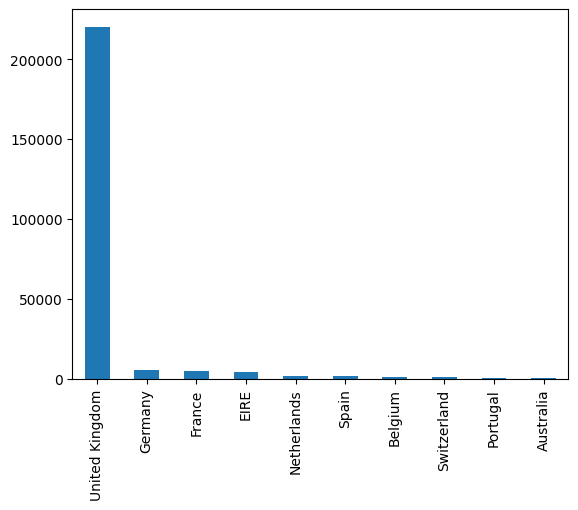

In [14]:
#Top ten country's customer
%matplotlib inline
df.Country.value_counts()[:10].plot(kind='bar')
plt.show()

In [15]:
uk_data = df.query("Country=='United Kingdom'").reset_index(drop=True)
uk_data.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,UnitPrice,Total_Purchase,Country
0,536365,2010-12-01,17850.0,6,2.55,15.30,United Kingdom
1,536365,2010-12-01,17850.0,6,3.39,20.34,United Kingdom
2,536365,2010-12-01,17850.0,8,2.75,22.00,United Kingdom
3,536365,2010-12-01,17850.0,2,7.65,15.30,United Kingdom
4,536365,2010-12-01,17850.0,6,4.25,25.50,United Kingdom


In [16]:
#Check for missing values
uk_data.isnull().sum(axis=0)

InvoiceNo         0
InvoiceDate       0
CustomerID        0
Quantity          0
UnitPrice         0
Total_Purchase    0
Country           0
dtype: int64

In [17]:
uk_data.shape

(220338, 7)

In [18]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220338 entries, 0 to 220337
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       220338 non-null  object 
 1   InvoiceDate     220338 non-null  object 
 2   CustomerID      220338 non-null  float64
 3   Quantity        220338 non-null  int64  
 4   UnitPrice       220338 non-null  float64
 5   Total_Purchase  220338 non-null  float64
 6   Country         220338 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 11.8+ MB


In [19]:
uk_data.describe()

,CustomerID,Quantity,UnitPrice,Total_Purchase
count,220338.000000,220338.000000,220338.000000,220338.000000
mean,15554.118023,14.135410,3.319834,24.937024
std,1595.466465,240.874069,22.560450,412.108876
min,12346.000000,1.000000,0.000000,0.000000
25%,14217.000000,2.000000,1.250000,5.000000
50%,15525.000000,5.000000,2.080000,12.500000
75%,16931.000000,12.000000,3.950000,19.900000
max,18287.000000,80995.000000,8142.750000,168469.600000


In [20]:
uk_data.to_csv("UK Retail Data.csv", index=False)